In [1]:
import os
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import pretrained_networks

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [3]:
tflib.init_tf()

In [6]:
network = '/data/ur/yoder/networks/stylegan2_256x256_balanced.pkl'

In [7]:
_G, _D, Gs = pretrained_networks.load_networks(network)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [8]:
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 1

In [11]:
names = ['Mike_points_G3.npy', 'Mike_points_G4FG.npy', 'Mike_points_Healthy.npy', 'Mike_points_Atrophy.npy', 'Mike_points_HGPIN.npy']

In [12]:
images = []
for i in range(0,len(names)):
    tens = np.load(names[i])
    images.append(tens)

In [13]:
images[0].shape

(1000, 512)

In [14]:
codes = np.asarray(images)

In [15]:
codes.shape

(5, 1000, 512)

In [16]:
def generate_image_from_w(Gs, w_code, seed=123):
    if seed is not None:
        noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
        rnd = np.random.RandomState(seed)
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
    all_images = Gs.components.synthesis.run(w_code, **Gs_syn_kwargs)
    return all_images

In [17]:
def convert_w_to_Gs_input(w_code):
    return np.expand_dims(np.transpose(np.zeros((1,14)) + np.expand_dims(w_code, 1), (1,0)), 0)

In [18]:
data = {}
for ws, name in zip(codes, names):
    data[name] = []
    for w in ws:
        out = generate_image_from_w(Gs, convert_w_to_Gs_input(w))
        # (1, 256, 256, 3)
        out = np.transpose(np.squeeze(out), (0,1,2))
        data[name].append(out)

In [19]:
def view_images(images):
    total = len(images)
    fig = plt.figure(figsize=(20,20))
    grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, (total // 2) + (total % 2)),
                 axes_pad=0.5,
                 )
    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.imshow(im)  

In [20]:
print(names)

['Mike_points_G3.npy', 'Mike_points_G4FG.npy', 'Mike_points_Healthy.npy', 'Mike_points_Atrophy.npy', 'Mike_points_HGPIN.npy']


Mike_points_G3.npy


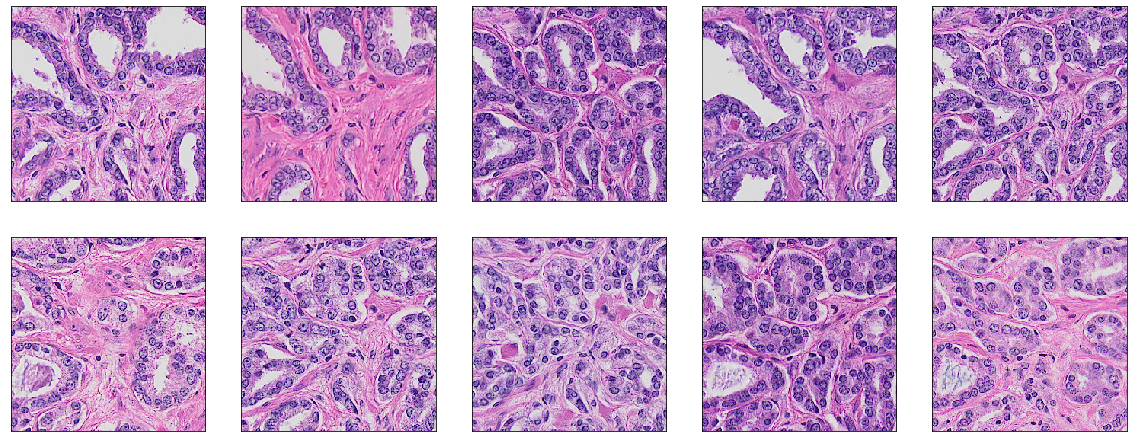

In [27]:
print(names[0])
view_images(data[names[0]][10:20])

Mike_points_G4FG.npy


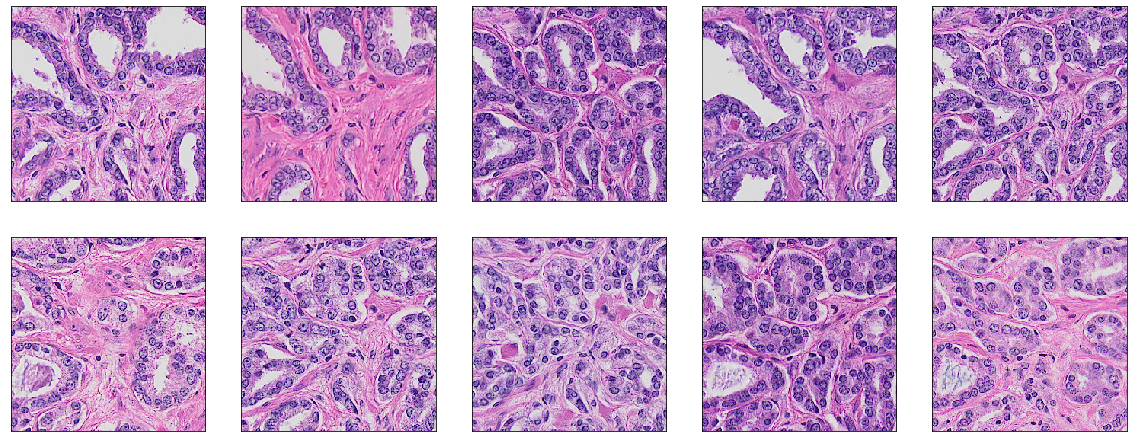

In [28]:
print(names[1])
view_images(data[names[0]][10:20])

Mike_points_Healthy.npy


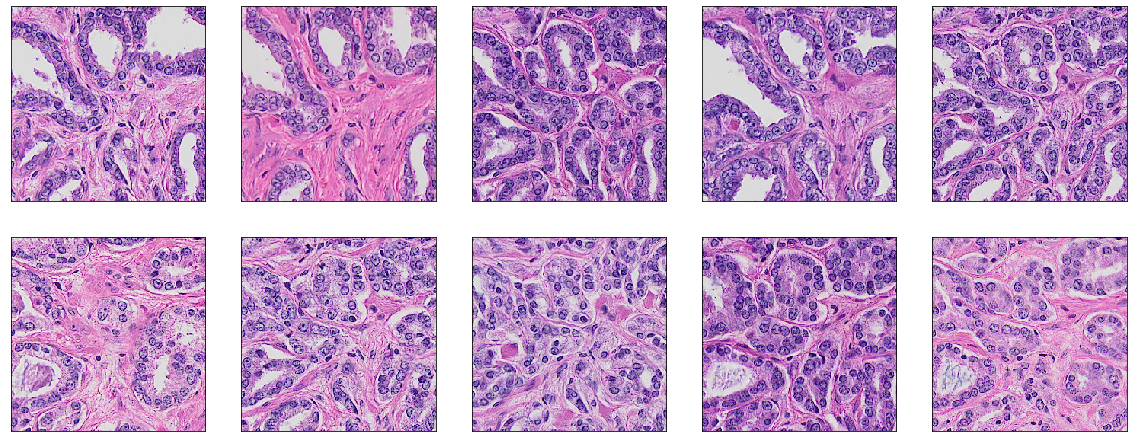

In [29]:
print(names[2])
view_images(data[names[0]][10:20])

Mike_points_Atrophy.npy


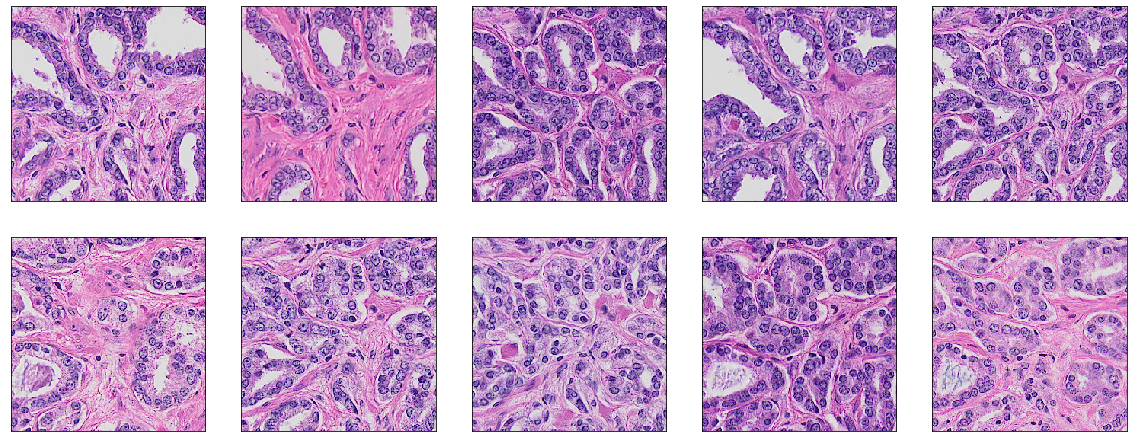

In [30]:
print(names[3])
view_images(data[names[0]][10:20])

Mike_points_HGPIN.npy


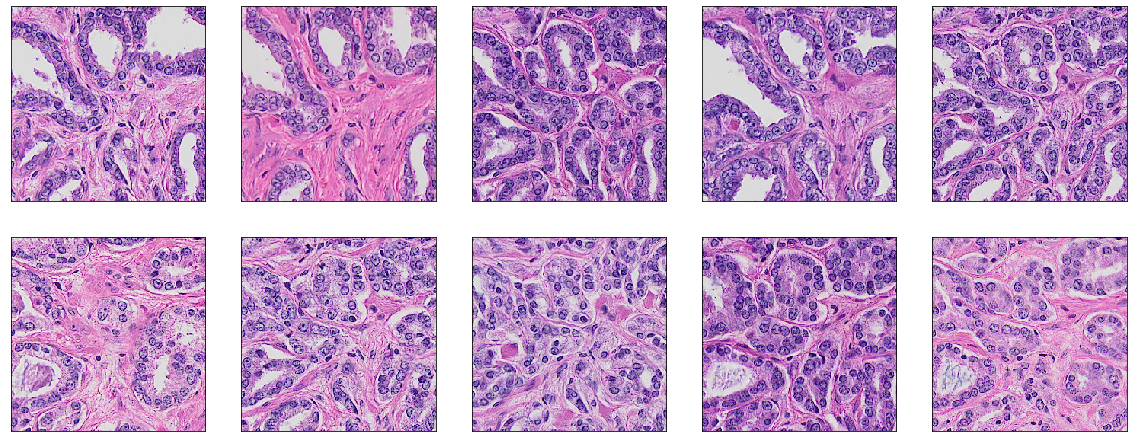

In [31]:
print(names[4])
view_images(data[names[0]][10:20])

In [33]:
all_imgs = []
for idx, (k, v) in enumerate(data.items()):
    for image in v:
        all_imgs.append((k,image))

In [34]:
len(all_imgs)

5000

In [35]:
import random
random.shuffle(all_imgs)

In [39]:
out_dir = "/data/ur/yoder/paper2/unimodal_clusters_Mike"

In [41]:
for idx, (name, img) in enumerate(all_imgs):
    print(idx, name)
    plt.imsave(os.path.join(out_dir,str(idx)+'.png'), img)

0 Mike_points_G4FG.npy
1 Mike_points_G3.npy
2 Mike_points_HGPIN.npy
3 Mike_points_HGPIN.npy
4 Mike_points_G3.npy
5 Mike_points_G4FG.npy
6 Mike_points_Atrophy.npy
7 Mike_points_Atrophy.npy
8 Mike_points_G3.npy
9 Mike_points_HGPIN.npy
10 Mike_points_G3.npy
11 Mike_points_G4FG.npy
12 Mike_points_Healthy.npy
13 Mike_points_G3.npy
14 Mike_points_Atrophy.npy
15 Mike_points_G3.npy
16 Mike_points_Atrophy.npy
17 Mike_points_G4FG.npy
18 Mike_points_Healthy.npy
19 Mike_points_G3.npy
20 Mike_points_G4FG.npy
21 Mike_points_G3.npy
22 Mike_points_HGPIN.npy
23 Mike_points_G4FG.npy
24 Mike_points_G3.npy
25 Mike_points_HGPIN.npy
26 Mike_points_HGPIN.npy
27 Mike_points_G3.npy
28 Mike_points_G3.npy
29 Mike_points_Healthy.npy
30 Mike_points_HGPIN.npy
31 Mike_points_G4FG.npy
32 Mike_points_Healthy.npy
33 Mike_points_G3.npy
34 Mike_points_Healthy.npy
35 Mike_points_HGPIN.npy
36 Mike_points_Healthy.npy
37 Mike_points_G3.npy
38 Mike_points_Atrophy.npy
39 Mike_points_Atrophy.npy
40 Mike_points_Healthy.npy
41 Mi

325 Mike_points_G4FG.npy
326 Mike_points_Healthy.npy
327 Mike_points_G3.npy
328 Mike_points_HGPIN.npy
329 Mike_points_HGPIN.npy
330 Mike_points_Healthy.npy
331 Mike_points_G4FG.npy
332 Mike_points_G4FG.npy
333 Mike_points_Healthy.npy
334 Mike_points_Healthy.npy
335 Mike_points_G3.npy
336 Mike_points_G4FG.npy
337 Mike_points_Atrophy.npy
338 Mike_points_Atrophy.npy
339 Mike_points_Healthy.npy
340 Mike_points_Atrophy.npy
341 Mike_points_Healthy.npy
342 Mike_points_Healthy.npy
343 Mike_points_G4FG.npy
344 Mike_points_Atrophy.npy
345 Mike_points_G4FG.npy
346 Mike_points_HGPIN.npy
347 Mike_points_HGPIN.npy
348 Mike_points_G4FG.npy
349 Mike_points_G4FG.npy
350 Mike_points_G3.npy
351 Mike_points_G4FG.npy
352 Mike_points_Healthy.npy
353 Mike_points_G3.npy
354 Mike_points_G4FG.npy
355 Mike_points_HGPIN.npy
356 Mike_points_Healthy.npy
357 Mike_points_G3.npy
358 Mike_points_Atrophy.npy
359 Mike_points_Atrophy.npy
360 Mike_points_HGPIN.npy
361 Mike_points_Healthy.npy
362 Mike_points_HGPIN.npy
363 M

643 Mike_points_G4FG.npy
644 Mike_points_Atrophy.npy
645 Mike_points_HGPIN.npy
646 Mike_points_HGPIN.npy
647 Mike_points_G3.npy
648 Mike_points_Healthy.npy
649 Mike_points_G4FG.npy
650 Mike_points_Atrophy.npy
651 Mike_points_G4FG.npy
652 Mike_points_Atrophy.npy
653 Mike_points_Atrophy.npy
654 Mike_points_G3.npy
655 Mike_points_Healthy.npy
656 Mike_points_Atrophy.npy
657 Mike_points_HGPIN.npy
658 Mike_points_Atrophy.npy
659 Mike_points_Atrophy.npy
660 Mike_points_HGPIN.npy
661 Mike_points_G4FG.npy
662 Mike_points_Healthy.npy
663 Mike_points_G3.npy
664 Mike_points_Atrophy.npy
665 Mike_points_Healthy.npy
666 Mike_points_Atrophy.npy
667 Mike_points_HGPIN.npy
668 Mike_points_G3.npy
669 Mike_points_G3.npy
670 Mike_points_HGPIN.npy
671 Mike_points_Healthy.npy
672 Mike_points_G4FG.npy
673 Mike_points_Healthy.npy
674 Mike_points_G4FG.npy
675 Mike_points_G3.npy
676 Mike_points_G3.npy
677 Mike_points_G4FG.npy
678 Mike_points_Atrophy.npy
679 Mike_points_G4FG.npy
680 Mike_points_G3.npy
681 Mike_poi

962 Mike_points_Atrophy.npy
963 Mike_points_G4FG.npy
964 Mike_points_HGPIN.npy
965 Mike_points_Atrophy.npy
966 Mike_points_Atrophy.npy
967 Mike_points_Atrophy.npy
968 Mike_points_G3.npy
969 Mike_points_Atrophy.npy
970 Mike_points_Healthy.npy
971 Mike_points_Atrophy.npy
972 Mike_points_HGPIN.npy
973 Mike_points_G3.npy
974 Mike_points_G3.npy
975 Mike_points_G3.npy
976 Mike_points_G3.npy
977 Mike_points_Healthy.npy
978 Mike_points_G4FG.npy
979 Mike_points_Atrophy.npy
980 Mike_points_G3.npy
981 Mike_points_G3.npy
982 Mike_points_G4FG.npy
983 Mike_points_HGPIN.npy
984 Mike_points_Atrophy.npy
985 Mike_points_G3.npy
986 Mike_points_Healthy.npy
987 Mike_points_Atrophy.npy
988 Mike_points_Healthy.npy
989 Mike_points_HGPIN.npy
990 Mike_points_Healthy.npy
991 Mike_points_Healthy.npy
992 Mike_points_HGPIN.npy
993 Mike_points_Healthy.npy
994 Mike_points_Healthy.npy
995 Mike_points_G3.npy
996 Mike_points_Healthy.npy
997 Mike_points_HGPIN.npy
998 Mike_points_G4FG.npy
999 Mike_points_HGPIN.npy
1000 Mi

1267 Mike_points_Healthy.npy
1268 Mike_points_G4FG.npy
1269 Mike_points_HGPIN.npy
1270 Mike_points_Healthy.npy
1271 Mike_points_Healthy.npy
1272 Mike_points_HGPIN.npy
1273 Mike_points_Atrophy.npy
1274 Mike_points_Healthy.npy
1275 Mike_points_G3.npy
1276 Mike_points_HGPIN.npy
1277 Mike_points_G3.npy
1278 Mike_points_Healthy.npy
1279 Mike_points_G4FG.npy
1280 Mike_points_G3.npy
1281 Mike_points_Atrophy.npy
1282 Mike_points_HGPIN.npy
1283 Mike_points_Atrophy.npy
1284 Mike_points_Healthy.npy
1285 Mike_points_Atrophy.npy
1286 Mike_points_Healthy.npy
1287 Mike_points_Atrophy.npy
1288 Mike_points_HGPIN.npy
1289 Mike_points_HGPIN.npy
1290 Mike_points_Atrophy.npy
1291 Mike_points_Atrophy.npy
1292 Mike_points_Healthy.npy
1293 Mike_points_HGPIN.npy
1294 Mike_points_G4FG.npy
1295 Mike_points_G4FG.npy
1296 Mike_points_HGPIN.npy
1297 Mike_points_Atrophy.npy
1298 Mike_points_G3.npy
1299 Mike_points_Atrophy.npy
1300 Mike_points_G4FG.npy
1301 Mike_points_Atrophy.npy
1302 Mike_points_G4FG.npy
1303 Mike_

1575 Mike_points_HGPIN.npy
1576 Mike_points_Healthy.npy
1577 Mike_points_G4FG.npy
1578 Mike_points_G3.npy
1579 Mike_points_G4FG.npy
1580 Mike_points_HGPIN.npy
1581 Mike_points_HGPIN.npy
1582 Mike_points_G4FG.npy
1583 Mike_points_G3.npy
1584 Mike_points_Atrophy.npy
1585 Mike_points_G3.npy
1586 Mike_points_G4FG.npy
1587 Mike_points_G4FG.npy
1588 Mike_points_Atrophy.npy
1589 Mike_points_Healthy.npy
1590 Mike_points_HGPIN.npy
1591 Mike_points_HGPIN.npy
1592 Mike_points_G4FG.npy
1593 Mike_points_G4FG.npy
1594 Mike_points_Atrophy.npy
1595 Mike_points_Atrophy.npy
1596 Mike_points_Healthy.npy
1597 Mike_points_G3.npy
1598 Mike_points_HGPIN.npy
1599 Mike_points_Atrophy.npy
1600 Mike_points_G4FG.npy
1601 Mike_points_G4FG.npy
1602 Mike_points_HGPIN.npy
1603 Mike_points_Atrophy.npy
1604 Mike_points_Healthy.npy
1605 Mike_points_Healthy.npy
1606 Mike_points_Healthy.npy
1607 Mike_points_HGPIN.npy
1608 Mike_points_HGPIN.npy
1609 Mike_points_G4FG.npy
1610 Mike_points_G3.npy
1611 Mike_points_G4FG.npy
161

1880 Mike_points_Atrophy.npy
1881 Mike_points_G4FG.npy
1882 Mike_points_HGPIN.npy
1883 Mike_points_HGPIN.npy
1884 Mike_points_Healthy.npy
1885 Mike_points_G3.npy
1886 Mike_points_Healthy.npy
1887 Mike_points_G4FG.npy
1888 Mike_points_G3.npy
1889 Mike_points_G3.npy
1890 Mike_points_G4FG.npy
1891 Mike_points_G3.npy
1892 Mike_points_Atrophy.npy
1893 Mike_points_HGPIN.npy
1894 Mike_points_HGPIN.npy
1895 Mike_points_G4FG.npy
1896 Mike_points_Atrophy.npy
1897 Mike_points_HGPIN.npy
1898 Mike_points_Atrophy.npy
1899 Mike_points_Healthy.npy
1900 Mike_points_HGPIN.npy
1901 Mike_points_G4FG.npy
1902 Mike_points_G4FG.npy
1903 Mike_points_G4FG.npy
1904 Mike_points_Healthy.npy
1905 Mike_points_Healthy.npy
1906 Mike_points_G3.npy
1907 Mike_points_Healthy.npy
1908 Mike_points_G3.npy
1909 Mike_points_G3.npy
1910 Mike_points_Healthy.npy
1911 Mike_points_HGPIN.npy
1912 Mike_points_G3.npy
1913 Mike_points_HGPIN.npy
1914 Mike_points_G3.npy
1915 Mike_points_Healthy.npy
1916 Mike_points_Atrophy.npy
1917 Mike

2188 Mike_points_Healthy.npy
2189 Mike_points_Atrophy.npy
2190 Mike_points_G3.npy
2191 Mike_points_G4FG.npy
2192 Mike_points_Atrophy.npy
2193 Mike_points_Atrophy.npy
2194 Mike_points_G4FG.npy
2195 Mike_points_G4FG.npy
2196 Mike_points_G3.npy
2197 Mike_points_HGPIN.npy
2198 Mike_points_G4FG.npy
2199 Mike_points_HGPIN.npy
2200 Mike_points_G3.npy
2201 Mike_points_G4FG.npy
2202 Mike_points_G4FG.npy
2203 Mike_points_HGPIN.npy
2204 Mike_points_Atrophy.npy
2205 Mike_points_HGPIN.npy
2206 Mike_points_G4FG.npy
2207 Mike_points_HGPIN.npy
2208 Mike_points_Atrophy.npy
2209 Mike_points_Healthy.npy
2210 Mike_points_HGPIN.npy
2211 Mike_points_HGPIN.npy
2212 Mike_points_Healthy.npy
2213 Mike_points_G4FG.npy
2214 Mike_points_HGPIN.npy
2215 Mike_points_Healthy.npy
2216 Mike_points_Atrophy.npy
2217 Mike_points_G4FG.npy
2218 Mike_points_G4FG.npy
2219 Mike_points_HGPIN.npy
2220 Mike_points_Healthy.npy
2221 Mike_points_G3.npy
2222 Mike_points_G4FG.npy
2223 Mike_points_G3.npy
2224 Mike_points_HGPIN.npy
2225 

2494 Mike_points_G3.npy
2495 Mike_points_G4FG.npy
2496 Mike_points_G3.npy
2497 Mike_points_HGPIN.npy
2498 Mike_points_G4FG.npy
2499 Mike_points_Atrophy.npy
2500 Mike_points_G3.npy
2501 Mike_points_Healthy.npy
2502 Mike_points_Atrophy.npy
2503 Mike_points_HGPIN.npy
2504 Mike_points_Healthy.npy
2505 Mike_points_HGPIN.npy
2506 Mike_points_G3.npy
2507 Mike_points_Healthy.npy
2508 Mike_points_Atrophy.npy
2509 Mike_points_G3.npy
2510 Mike_points_Healthy.npy
2511 Mike_points_G3.npy
2512 Mike_points_Healthy.npy
2513 Mike_points_Atrophy.npy
2514 Mike_points_Healthy.npy
2515 Mike_points_HGPIN.npy
2516 Mike_points_G4FG.npy
2517 Mike_points_Atrophy.npy
2518 Mike_points_Healthy.npy
2519 Mike_points_HGPIN.npy
2520 Mike_points_Atrophy.npy
2521 Mike_points_HGPIN.npy
2522 Mike_points_Healthy.npy
2523 Mike_points_Healthy.npy
2524 Mike_points_G4FG.npy
2525 Mike_points_G4FG.npy
2526 Mike_points_Atrophy.npy
2527 Mike_points_G4FG.npy
2528 Mike_points_Healthy.npy
2529 Mike_points_G3.npy
2530 Mike_points_Atro

2802 Mike_points_Atrophy.npy
2803 Mike_points_HGPIN.npy
2804 Mike_points_G4FG.npy
2805 Mike_points_G3.npy
2806 Mike_points_Atrophy.npy
2807 Mike_points_Atrophy.npy
2808 Mike_points_HGPIN.npy
2809 Mike_points_G4FG.npy
2810 Mike_points_G4FG.npy
2811 Mike_points_HGPIN.npy
2812 Mike_points_G4FG.npy
2813 Mike_points_Healthy.npy
2814 Mike_points_Healthy.npy
2815 Mike_points_G3.npy
2816 Mike_points_Atrophy.npy
2817 Mike_points_G3.npy
2818 Mike_points_HGPIN.npy
2819 Mike_points_Atrophy.npy
2820 Mike_points_Atrophy.npy
2821 Mike_points_G4FG.npy
2822 Mike_points_HGPIN.npy
2823 Mike_points_G4FG.npy
2824 Mike_points_Healthy.npy
2825 Mike_points_Atrophy.npy
2826 Mike_points_G4FG.npy
2827 Mike_points_Healthy.npy
2828 Mike_points_Healthy.npy
2829 Mike_points_HGPIN.npy
2830 Mike_points_G4FG.npy
2831 Mike_points_Atrophy.npy
2832 Mike_points_Healthy.npy
2833 Mike_points_Healthy.npy
2834 Mike_points_HGPIN.npy
2835 Mike_points_G4FG.npy
2836 Mike_points_G3.npy
2837 Mike_points_Atrophy.npy
2838 Mike_points_

3109 Mike_points_G3.npy
3110 Mike_points_Atrophy.npy
3111 Mike_points_G3.npy
3112 Mike_points_Atrophy.npy
3113 Mike_points_G4FG.npy
3114 Mike_points_G4FG.npy
3115 Mike_points_HGPIN.npy
3116 Mike_points_HGPIN.npy
3117 Mike_points_Healthy.npy
3118 Mike_points_Healthy.npy
3119 Mike_points_Healthy.npy
3120 Mike_points_Healthy.npy
3121 Mike_points_G4FG.npy
3122 Mike_points_G3.npy
3123 Mike_points_Atrophy.npy
3124 Mike_points_HGPIN.npy
3125 Mike_points_G3.npy
3126 Mike_points_Atrophy.npy
3127 Mike_points_G3.npy
3128 Mike_points_G3.npy
3129 Mike_points_HGPIN.npy
3130 Mike_points_G3.npy
3131 Mike_points_G3.npy
3132 Mike_points_Healthy.npy
3133 Mike_points_Healthy.npy
3134 Mike_points_G3.npy
3135 Mike_points_Healthy.npy
3136 Mike_points_G3.npy
3137 Mike_points_Healthy.npy
3138 Mike_points_G4FG.npy
3139 Mike_points_G4FG.npy
3140 Mike_points_Healthy.npy
3141 Mike_points_G4FG.npy
3142 Mike_points_Atrophy.npy
3143 Mike_points_Healthy.npy
3144 Mike_points_G3.npy
3145 Mike_points_HGPIN.npy
3146 Mike_

3414 Mike_points_G4FG.npy
3415 Mike_points_HGPIN.npy
3416 Mike_points_G4FG.npy
3417 Mike_points_Atrophy.npy
3418 Mike_points_G3.npy
3419 Mike_points_HGPIN.npy
3420 Mike_points_Healthy.npy
3421 Mike_points_HGPIN.npy
3422 Mike_points_Healthy.npy
3423 Mike_points_G3.npy
3424 Mike_points_G4FG.npy
3425 Mike_points_Healthy.npy
3426 Mike_points_G4FG.npy
3427 Mike_points_HGPIN.npy
3428 Mike_points_G3.npy
3429 Mike_points_Atrophy.npy
3430 Mike_points_HGPIN.npy
3431 Mike_points_Atrophy.npy
3432 Mike_points_HGPIN.npy
3433 Mike_points_G3.npy
3434 Mike_points_G3.npy
3435 Mike_points_G4FG.npy
3436 Mike_points_HGPIN.npy
3437 Mike_points_HGPIN.npy
3438 Mike_points_Atrophy.npy
3439 Mike_points_Healthy.npy
3440 Mike_points_G4FG.npy
3441 Mike_points_HGPIN.npy
3442 Mike_points_Atrophy.npy
3443 Mike_points_HGPIN.npy
3444 Mike_points_G3.npy
3445 Mike_points_Healthy.npy
3446 Mike_points_Atrophy.npy
3447 Mike_points_HGPIN.npy
3448 Mike_points_G3.npy
3449 Mike_points_G3.npy
3450 Mike_points_G3.npy
3451 Mike_po

3722 Mike_points_Healthy.npy
3723 Mike_points_G3.npy
3724 Mike_points_Healthy.npy
3725 Mike_points_HGPIN.npy
3726 Mike_points_Atrophy.npy
3727 Mike_points_HGPIN.npy
3728 Mike_points_HGPIN.npy
3729 Mike_points_G3.npy
3730 Mike_points_Healthy.npy
3731 Mike_points_HGPIN.npy
3732 Mike_points_G3.npy
3733 Mike_points_G4FG.npy
3734 Mike_points_G4FG.npy
3735 Mike_points_HGPIN.npy
3736 Mike_points_Healthy.npy
3737 Mike_points_Healthy.npy
3738 Mike_points_G3.npy
3739 Mike_points_Healthy.npy
3740 Mike_points_HGPIN.npy
3741 Mike_points_Atrophy.npy
3742 Mike_points_Healthy.npy
3743 Mike_points_G3.npy
3744 Mike_points_Healthy.npy
3745 Mike_points_G4FG.npy
3746 Mike_points_Atrophy.npy
3747 Mike_points_Atrophy.npy
3748 Mike_points_HGPIN.npy
3749 Mike_points_G4FG.npy
3750 Mike_points_G3.npy
3751 Mike_points_Healthy.npy
3752 Mike_points_Healthy.npy
3753 Mike_points_G3.npy
3754 Mike_points_G4FG.npy
3755 Mike_points_Healthy.npy
3756 Mike_points_Healthy.npy
3757 Mike_points_Atrophy.npy
3758 Mike_points_Hea

4030 Mike_points_Atrophy.npy
4031 Mike_points_HGPIN.npy
4032 Mike_points_Healthy.npy
4033 Mike_points_Atrophy.npy
4034 Mike_points_Atrophy.npy
4035 Mike_points_G4FG.npy
4036 Mike_points_Atrophy.npy
4037 Mike_points_HGPIN.npy
4038 Mike_points_G3.npy
4039 Mike_points_Atrophy.npy
4040 Mike_points_Healthy.npy
4041 Mike_points_G3.npy
4042 Mike_points_Atrophy.npy
4043 Mike_points_Atrophy.npy
4044 Mike_points_Healthy.npy
4045 Mike_points_G3.npy
4046 Mike_points_Healthy.npy
4047 Mike_points_G3.npy
4048 Mike_points_HGPIN.npy
4049 Mike_points_Healthy.npy
4050 Mike_points_G3.npy
4051 Mike_points_Atrophy.npy
4052 Mike_points_HGPIN.npy
4053 Mike_points_HGPIN.npy
4054 Mike_points_Healthy.npy
4055 Mike_points_Healthy.npy
4056 Mike_points_G3.npy
4057 Mike_points_G3.npy
4058 Mike_points_G4FG.npy
4059 Mike_points_G4FG.npy
4060 Mike_points_G3.npy
4061 Mike_points_Atrophy.npy
4062 Mike_points_G4FG.npy
4063 Mike_points_HGPIN.npy
4064 Mike_points_G3.npy
4065 Mike_points_G4FG.npy
4066 Mike_points_HGPIN.npy
4

4337 Mike_points_G3.npy
4338 Mike_points_G4FG.npy
4339 Mike_points_G3.npy
4340 Mike_points_Healthy.npy
4341 Mike_points_G3.npy
4342 Mike_points_Atrophy.npy
4343 Mike_points_G4FG.npy
4344 Mike_points_HGPIN.npy
4345 Mike_points_HGPIN.npy
4346 Mike_points_Healthy.npy
4347 Mike_points_G4FG.npy
4348 Mike_points_Atrophy.npy
4349 Mike_points_Healthy.npy
4350 Mike_points_HGPIN.npy
4351 Mike_points_HGPIN.npy
4352 Mike_points_HGPIN.npy
4353 Mike_points_G3.npy
4354 Mike_points_Healthy.npy
4355 Mike_points_Atrophy.npy
4356 Mike_points_Healthy.npy
4357 Mike_points_Healthy.npy
4358 Mike_points_G4FG.npy
4359 Mike_points_Atrophy.npy
4360 Mike_points_G4FG.npy
4361 Mike_points_HGPIN.npy
4362 Mike_points_G4FG.npy
4363 Mike_points_HGPIN.npy
4364 Mike_points_HGPIN.npy
4365 Mike_points_G4FG.npy
4366 Mike_points_Atrophy.npy
4367 Mike_points_G3.npy
4368 Mike_points_G4FG.npy
4369 Mike_points_G3.npy
4370 Mike_points_G3.npy
4371 Mike_points_G3.npy
4372 Mike_points_G4FG.npy
4373 Mike_points_G3.npy
4374 Mike_point

4646 Mike_points_G4FG.npy
4647 Mike_points_Atrophy.npy
4648 Mike_points_G4FG.npy
4649 Mike_points_G3.npy
4650 Mike_points_Healthy.npy
4651 Mike_points_G4FG.npy
4652 Mike_points_G3.npy
4653 Mike_points_HGPIN.npy
4654 Mike_points_Atrophy.npy
4655 Mike_points_G3.npy
4656 Mike_points_HGPIN.npy
4657 Mike_points_G4FG.npy
4658 Mike_points_G3.npy
4659 Mike_points_HGPIN.npy
4660 Mike_points_HGPIN.npy
4661 Mike_points_Atrophy.npy
4662 Mike_points_G4FG.npy
4663 Mike_points_G4FG.npy
4664 Mike_points_Healthy.npy
4665 Mike_points_HGPIN.npy
4666 Mike_points_G4FG.npy
4667 Mike_points_Atrophy.npy
4668 Mike_points_G4FG.npy
4669 Mike_points_G3.npy
4670 Mike_points_Atrophy.npy
4671 Mike_points_HGPIN.npy
4672 Mike_points_HGPIN.npy
4673 Mike_points_HGPIN.npy
4674 Mike_points_Healthy.npy
4675 Mike_points_Atrophy.npy
4676 Mike_points_Atrophy.npy
4677 Mike_points_G3.npy
4678 Mike_points_HGPIN.npy
4679 Mike_points_Healthy.npy
4680 Mike_points_Atrophy.npy
4681 Mike_points_G3.npy
4682 Mike_points_Healthy.npy
4683

4953 Mike_points_Healthy.npy
4954 Mike_points_HGPIN.npy
4955 Mike_points_G3.npy
4956 Mike_points_HGPIN.npy
4957 Mike_points_Healthy.npy
4958 Mike_points_Healthy.npy
4959 Mike_points_G3.npy
4960 Mike_points_Atrophy.npy
4961 Mike_points_HGPIN.npy
4962 Mike_points_G3.npy
4963 Mike_points_Healthy.npy
4964 Mike_points_Atrophy.npy
4965 Mike_points_Healthy.npy
4966 Mike_points_G3.npy
4967 Mike_points_Healthy.npy
4968 Mike_points_G4FG.npy
4969 Mike_points_G4FG.npy
4970 Mike_points_G4FG.npy
4971 Mike_points_G4FG.npy
4972 Mike_points_HGPIN.npy
4973 Mike_points_G4FG.npy
4974 Mike_points_Atrophy.npy
4975 Mike_points_G3.npy
4976 Mike_points_HGPIN.npy
4977 Mike_points_Healthy.npy
4978 Mike_points_G4FG.npy
4979 Mike_points_G4FG.npy
4980 Mike_points_Atrophy.npy
4981 Mike_points_Atrophy.npy
4982 Mike_points_Healthy.npy
4983 Mike_points_G3.npy
4984 Mike_points_Healthy.npy
4985 Mike_points_G4FG.npy
4986 Mike_points_HGPIN.npy
4987 Mike_points_G3.npy
4988 Mike_points_G4FG.npy
4989 Mike_points_Atrophy.npy
4

In [49]:
import pandas as pd

In [59]:
data = pd.DataFrame([(idx, name) for idx, (name, img) in enumerate(all_imgs)],columns=['Index','Filename'])

In [63]:
data['Class'] = data['Filename'].str.extract(r'Mike_points_(.*)\.npy')

In [65]:
data

Index                 Filename    Class
0         0     Mike_points_G4FG.npy     G4FG
1         1       Mike_points_G3.npy       G3
2         2    Mike_points_HGPIN.npy    HGPIN
3         3    Mike_points_HGPIN.npy    HGPIN
4         4       Mike_points_G3.npy       G3
...     ...                      ...      ...
4995   4995       Mike_points_G3.npy       G3
4996   4996  Mike_points_Atrophy.npy  Atrophy
4997   4997     Mike_points_G4FG.npy     G4FG
4998   4998    Mike_points_HGPIN.npy    HGPIN
4999   4999  Mike_points_Healthy.npy  Healthy

[5000 rows x 3 columns]

In [66]:
data.to_csv(out_dir+'/key.csv',index=False)